In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
df = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv",parse_dates = ['date'],index_col='date')
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [3]:
df.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [4]:
df.shape

(2182, 1)

In [5]:
print(f"The Full year Gold prices are available for {df.index.year.max() - df.index.year.min()} years")

The Full year Gold prices are available for 5 years


## Data Cleaning 

+ Detecting and Handling Missing values

In [6]:
missing_values = df.isnull().sum() # Handing missing values
print(f"Missing Values are :- {missing_values}")

Missing Values are :- price    0
dtype: int64


#### No missing values in the data set

+ Detecting and Handling Duplicate values

In [7]:
df[df.duplicated()]

,price
date,
2016-04-24,2651.4
2016-04-30,2521.5
2016-06-20,2759.8
2016-08-05,2679.9
2016-09-05,2705.0
...,...
2021-12-06,4413.6
2021-12-09,4219.4
2021-12-12,4333.5


+ Since our date is already set as index we are filnding duplicate value for price column but for any entry being duplicate both the date and price should be repeated, for checking that we rest our index temporarily 

In [8]:
df_reset = df.reset_index()
print(f"Total Duplicates in the Data are {df_reset[df_reset.duplicated(subset=['date','price'])]}")

Total Duplicates in the Data are Empty DataFrame
Columns: [date, price]
Index: []


+ Checking and Handling outliers

In [9]:
df_3 = df.copy()

In [10]:
from scipy import stats
score = stats.zscore(df_3['price'])
abs_zscore = np.abs(score)
filtered_entries = df_3[abs_zscore < 3]

In [11]:
print(filtered_entries.shape)

(2182, 1)


+ As we can see that the shape of dataframes 'filtered_entries' and 'df' is same we can be assured that there is no outlier in our data

### Normality Check for the Data

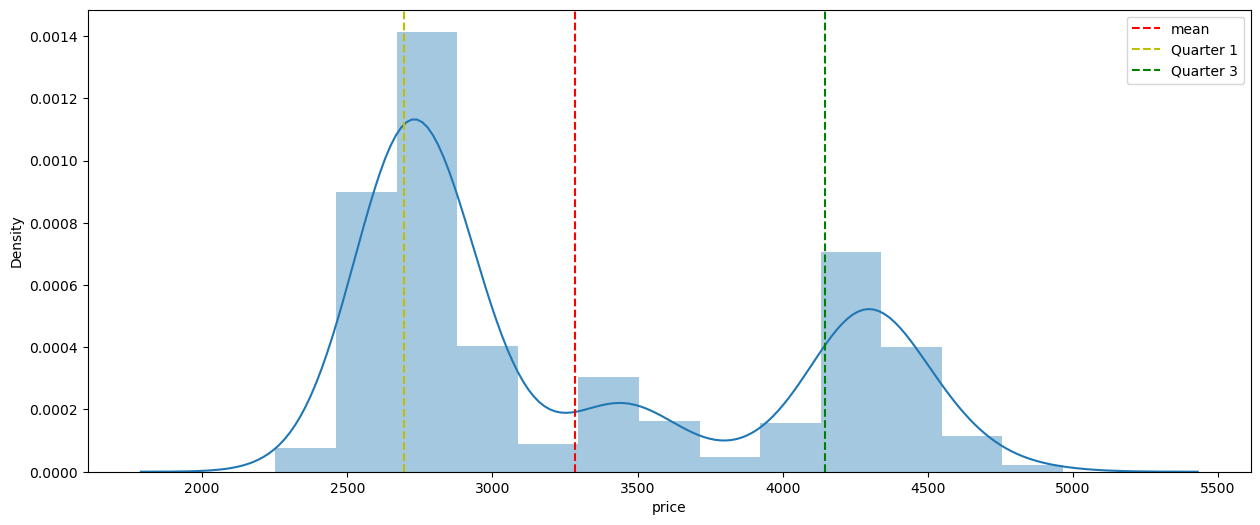

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])
plt.axvline(x = np.mean(df['price']),c = 'r', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(df['price'],25),c = 'y', ls = '--', label = 'Quarter 1')
plt.axvline(x = np.percentile(df['price'],75),c = 'g', ls = '--', label = 'Quarter 3')
plt.legend()
plt.show()

## Checking the Trend in Data

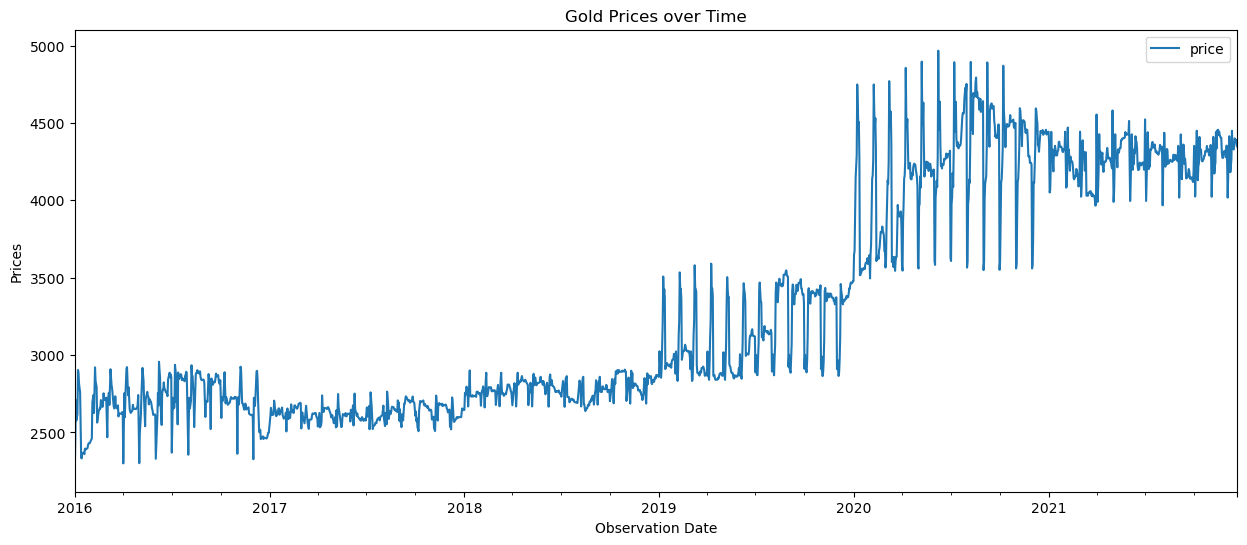

In [13]:
df.plot(figsize = (15,6))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices over Time")
plt.show()

In [14]:
df_temp = df.copy()
df_temp['Percentage Change'] = df_temp['price'].pct_change()*100
df_temp.head()

,price,Percentage Change
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,8.962976
2016-01-03,2708.10,10.332043
2016-01-04,2577.80,-4.811491
2016-01-05,2597.75,0.773916


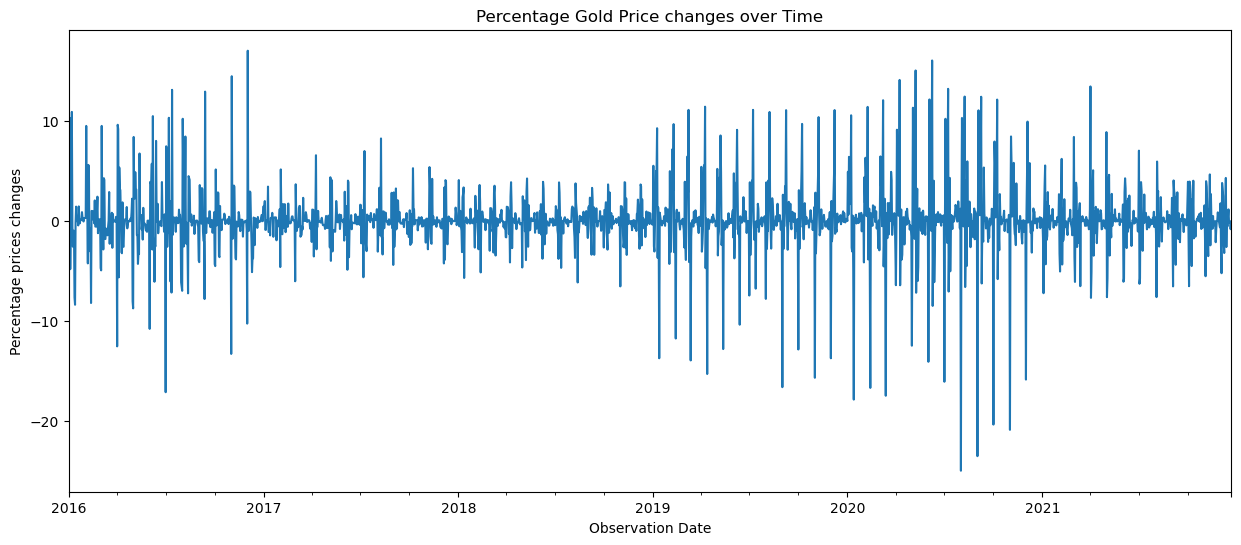

In [15]:
df_temp['Percentage Change'].plot(figsize = (15,6))
plt.xlabel("Observation Date")
plt.ylabel("Percentage prices changes")
plt.title("Percentage Gold Price changes over Time")
plt.show()

#### Simple moving average

In [16]:
df1 = df.copy()
df1.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [17]:
df1['7day_rolling'] = df1.rolling(window=7,min_periods=1).mean()

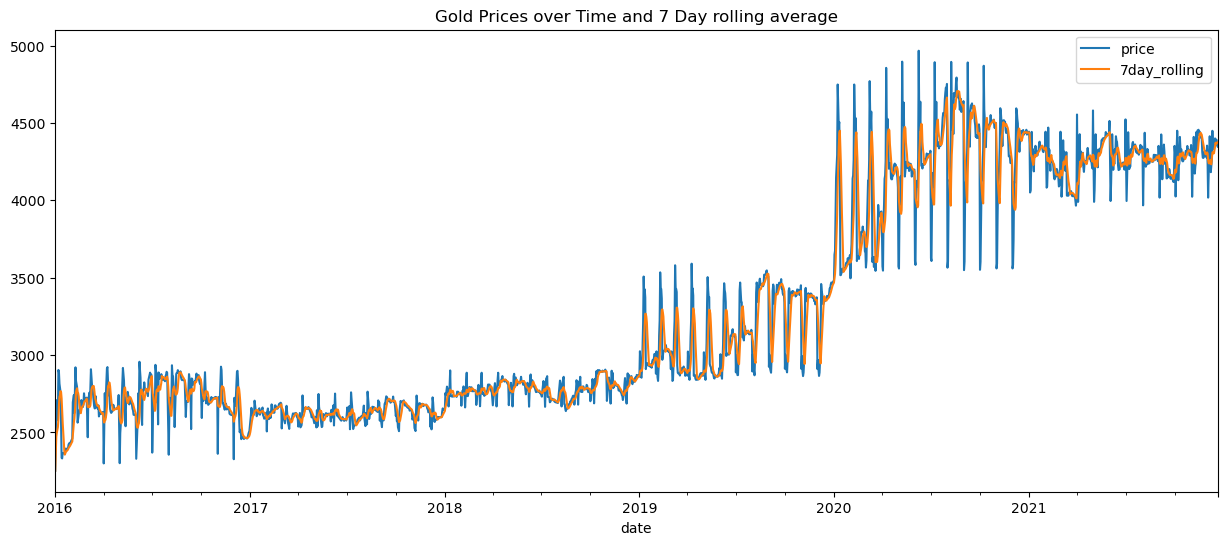

In [18]:
df1[['price','7day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 7 Day rolling average")
plt.legend()
plt.show()

In [19]:
df1['30day_rolling'] = df1['price'].rolling(window=30,min_periods=1).mean()

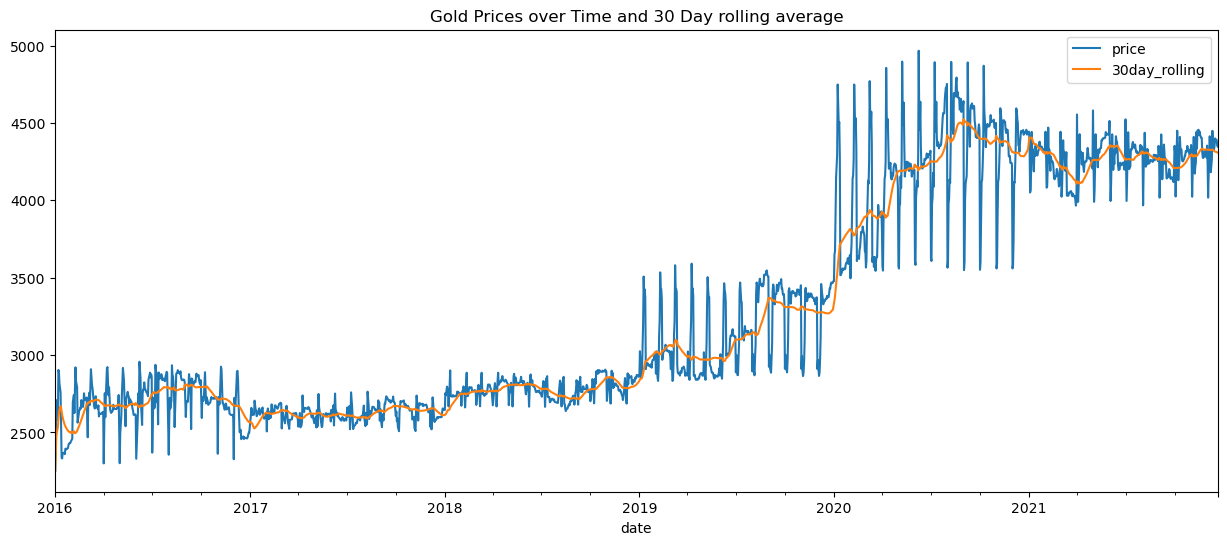

In [20]:
df1[['price','30day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 30 Day rolling average")
plt.legend()
plt.show()

####  Cell 21 and 22  Reference for doubt cell

In [21]:
df1['1day_rolling'] = df1['price'].rolling(window=1,min_periods=1).mean()

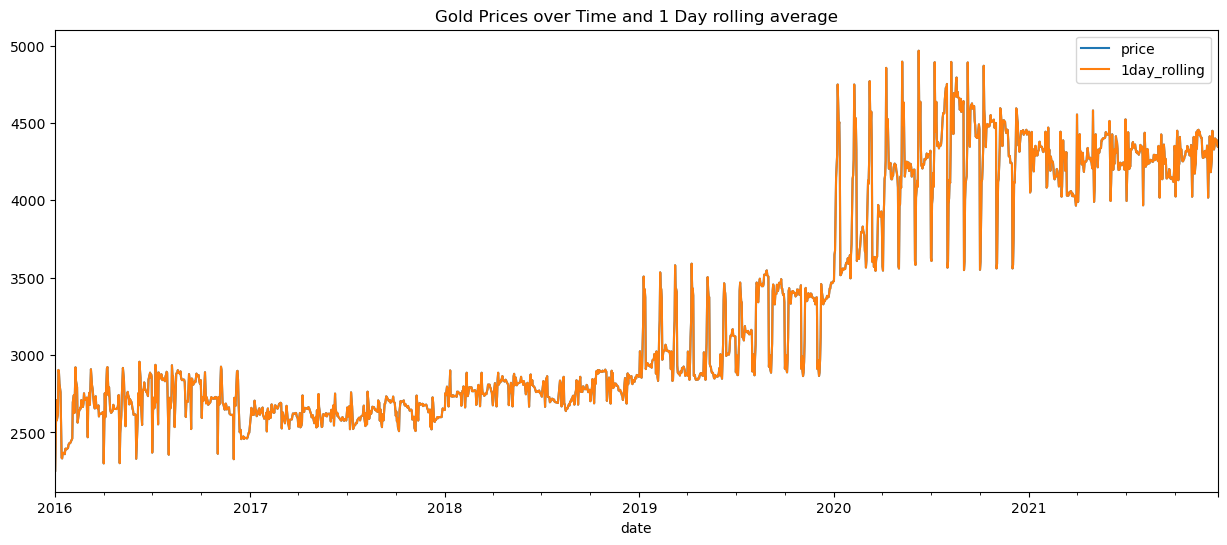

In [22]:
df1[['price','1day_rolling']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and 1 Day rolling average")
plt.legend()
plt.show()

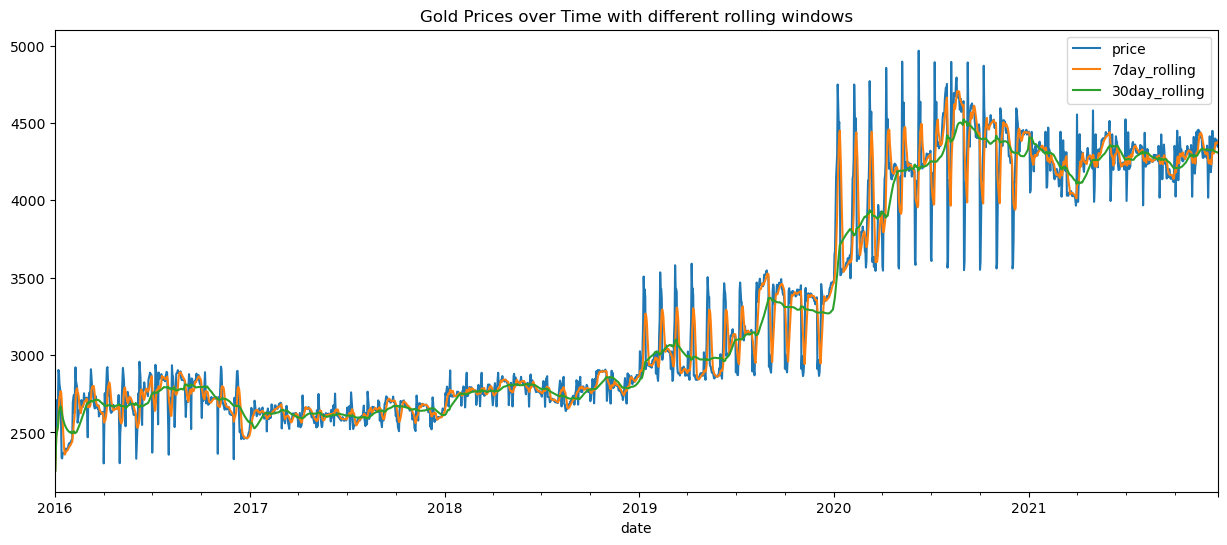

In [23]:
df1[['price','7day_rolling','30day_rolling']].plot(figsize= (15,6))
plt.title("Gold Prices over Time with different rolling windows")
plt.legend()
plt.show()

### Expanding - Cummlative moving average

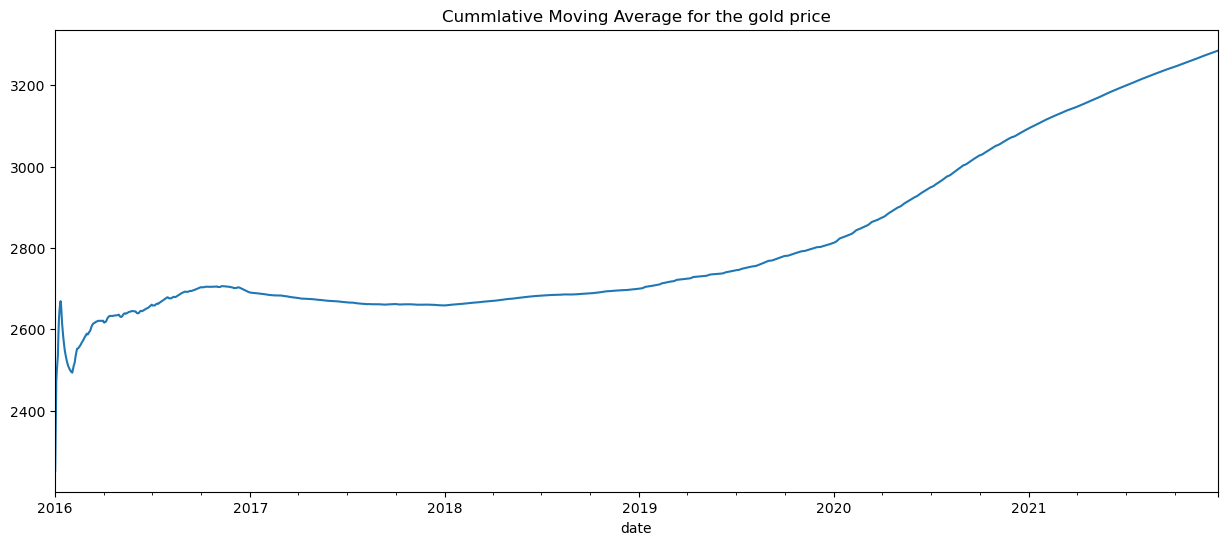

In [24]:
df1['price'].expanding().mean().plot(figsize= (15,6))
plt.title("Cummlative Moving Average for the gold price")
plt.show()

### EMA :- Exponential Moving Average

In [25]:
df1['EMA_0.1'] = df1['price'].ewm(alpha=0.1,adjust=False).mean()

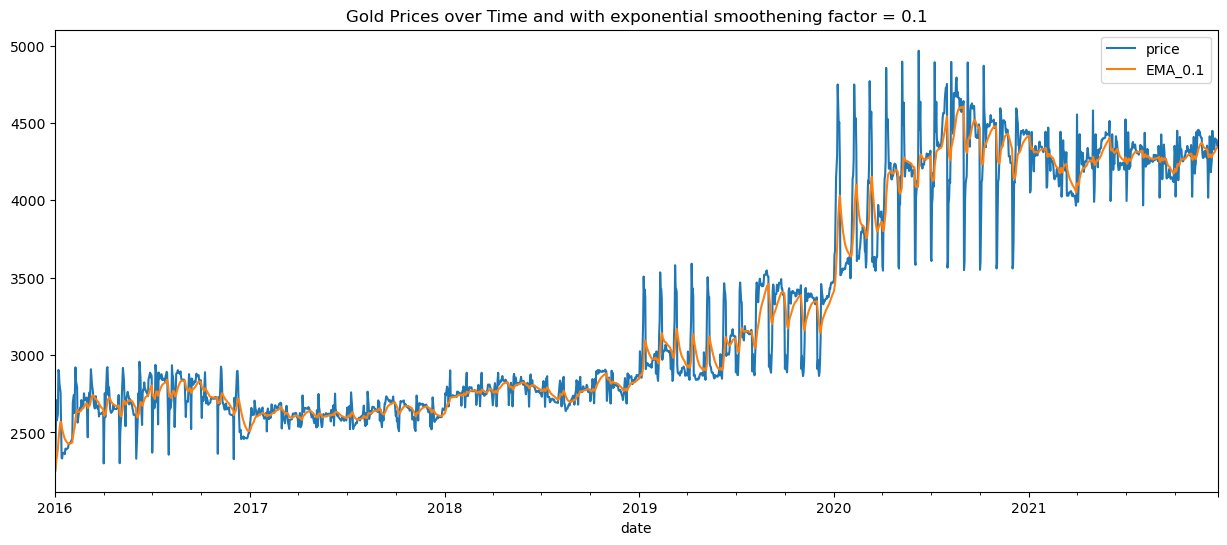

In [26]:
df1[['price','EMA_0.1']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.1")
plt.legend()
plt.show()

In [27]:
df1['EMA_0.5'] = df1['price'].ewm(alpha=0.5,adjust=False).mean()

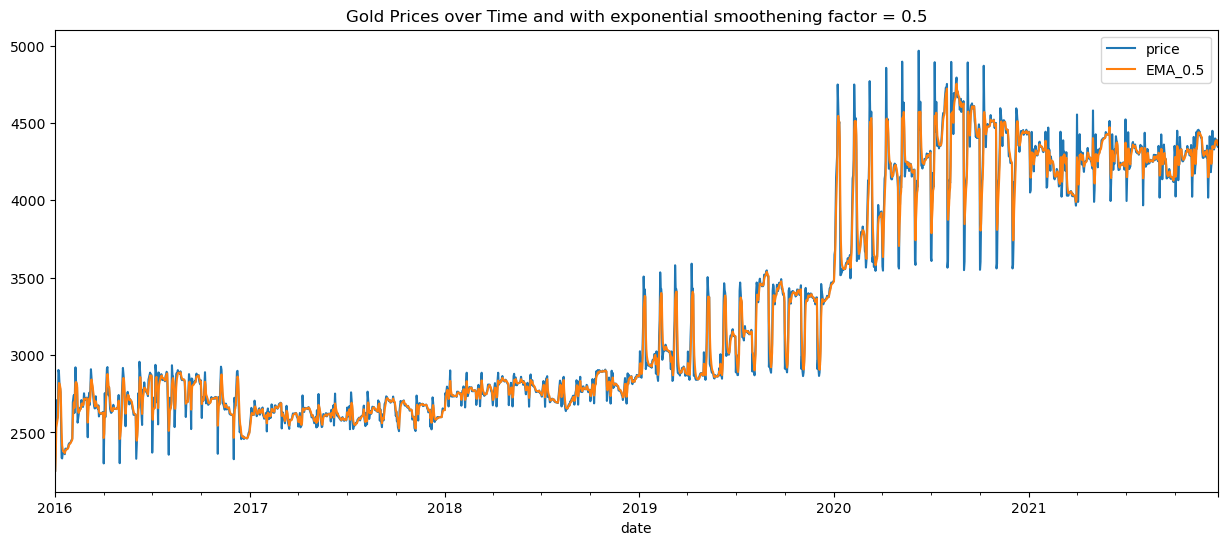

In [28]:
df1[['price','EMA_0.5']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.5")
plt.legend()
plt.show()

In [29]:
df1['EMA_0.7'] = df1['price'].ewm(alpha=0.7,adjust=False).mean()

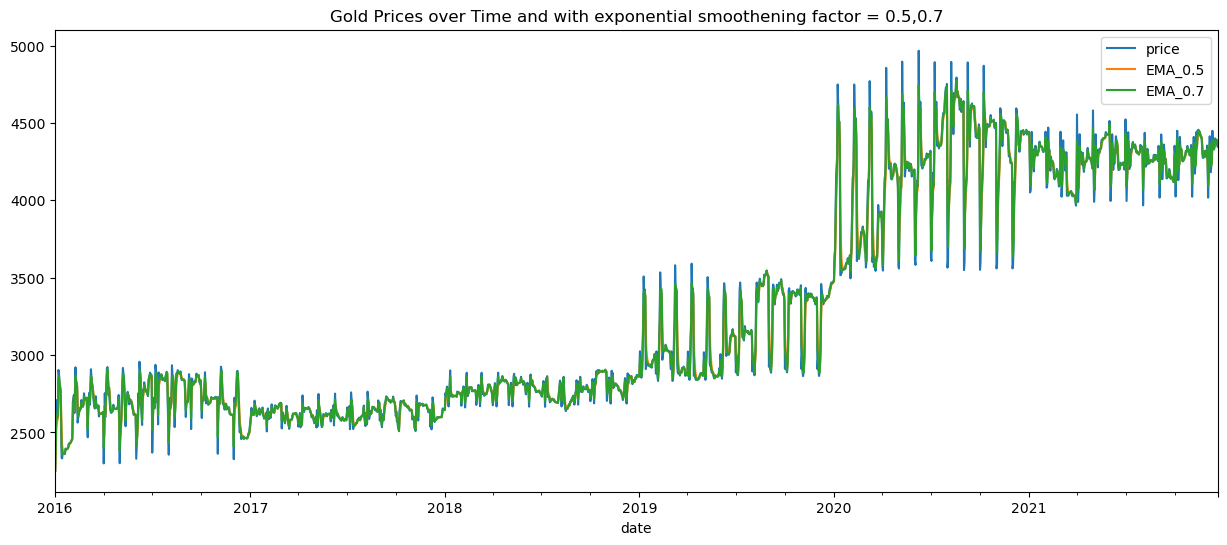

In [30]:
df1[['price','EMA_0.5','EMA_0.7']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.5,0.7")
plt.legend()
plt.show()

In [31]:
df1['EMA_0.9'] = df1['price'].ewm(alpha=0.9,adjust=False).mean()

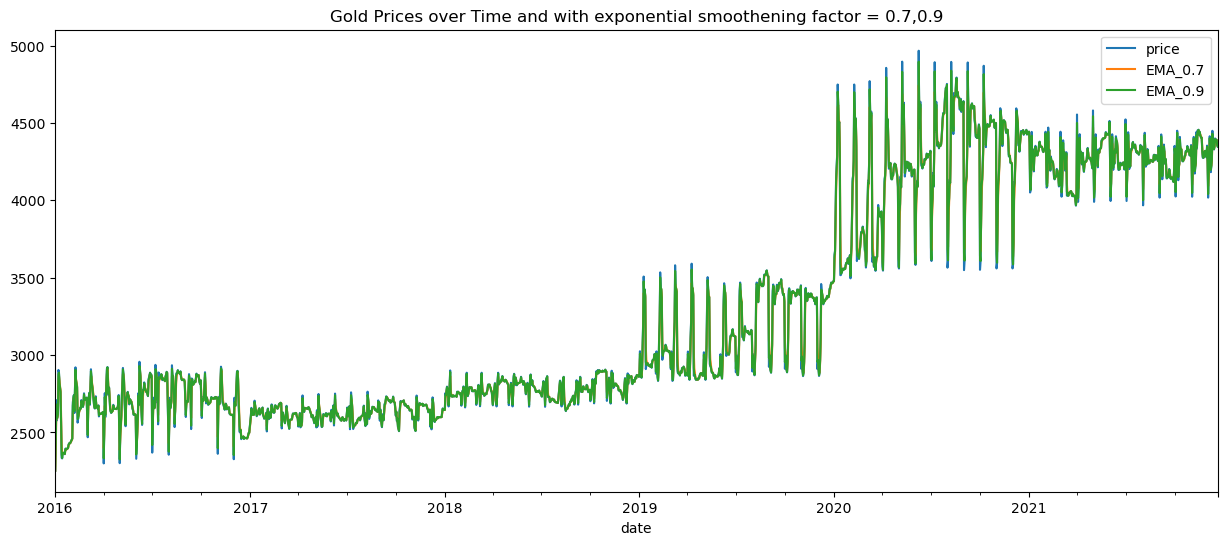

In [32]:
df1[['price','EMA_0.7','EMA_0.9']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.7,0.9")
plt.legend()
plt.show()

In [33]:
df1['EMA_1'] = df1['price'].ewm(alpha=1,adjust=False).mean()

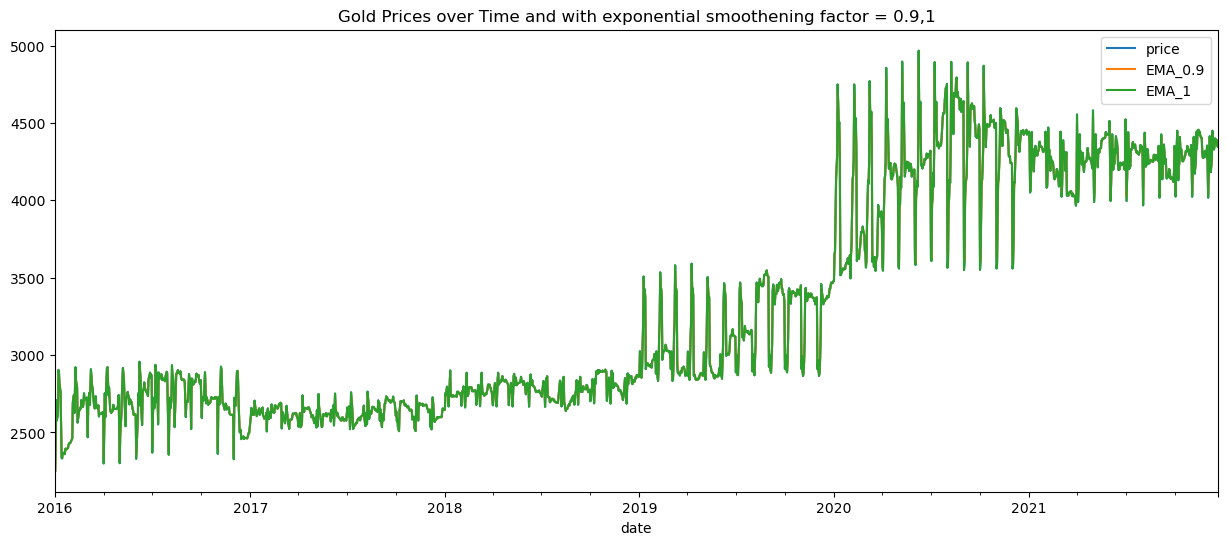

In [34]:
df1[['price','EMA_0.9','EMA_1']].plot(figsize=(15,6))
plt.title("Gold Prices over Time and with exponential smoothening factor = 0.9,1")
plt.legend()
plt.show()

### Exponential moving average specifying the span

In [35]:
df1['EWMA_1'] = df1['price'].ewm(span=1).mean()

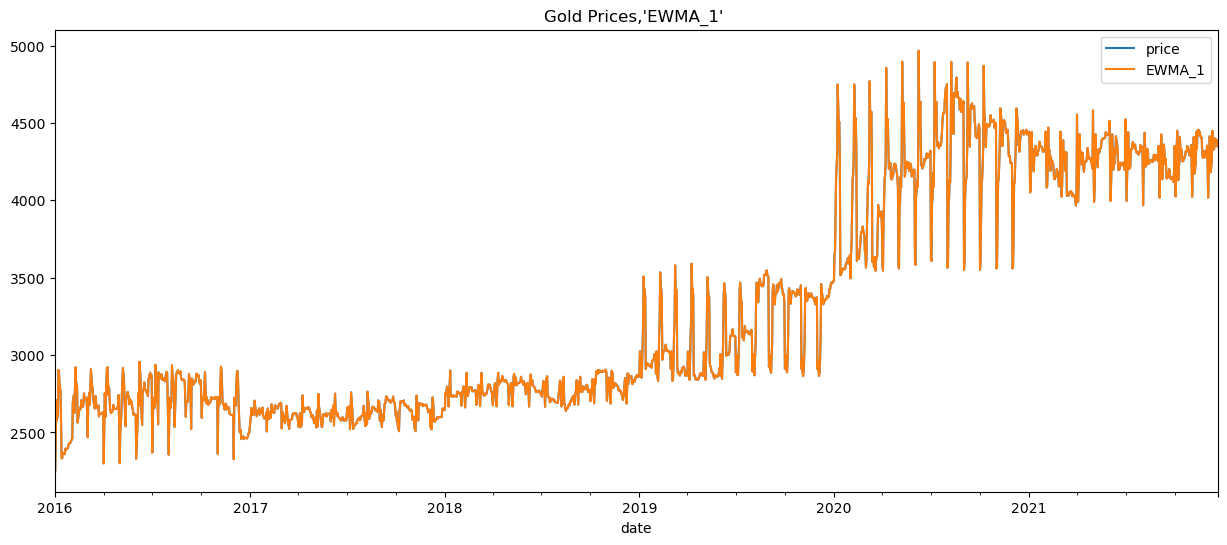

In [36]:
df1[['price','EWMA_1']].plot(figsize=(15,6))
plt.title("Gold Prices,'EWMA_1' ")
plt.legend()
plt.show()

### OBS 1 :-  

### Source :- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html  :- 
If your EDA plot for data points with span = 1 coincides, it suggests that the Exponential Moving Average (EMA) with span = 1 behaves similarly to the Simple Moving Average (SMA). In other words, each data point has equal weight in the calculation, similar to a regular average.

Stability of Data: If the EMA with span = 1 closely matches the original data points, it might indicate that your data is relatively stable or doesn't exhibit strong trends or seasonality that would be captured better with a larger span.

Noise Level: A close match between EMA with span = 1 and the data points could imply that there is minimal noise in your data, as the EMA isn't smoothing out any fluctuations.

Suitability of SMA: Since EMA with span = 1 behaves like a simple average, it might suggest that using a simple moving average (span = n, where n is the number of data points) could suffice for your analysis instead of using EMA.

However, this observation can provide insights, it's essential to consider other factors, such as the overall trend, seasonality, and your specific analytical objectives, before drawing firm conclusions.

### Monthly variation of the Gold Price 

In [37]:
df2= df.copy()

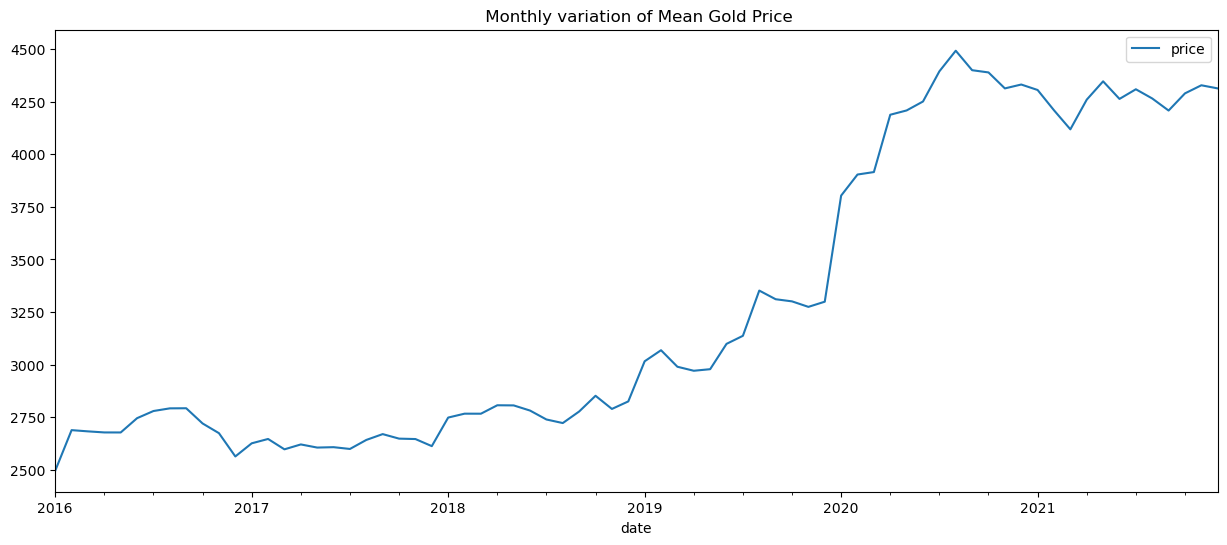

In [38]:
df2.resample('M').mean().plot(figsize=(15,6))
plt.title(" Monthly variation of Mean Gold Price")
plt.show()

### Weekly variation of the Gold Price

In [39]:
df3 = df.copy()

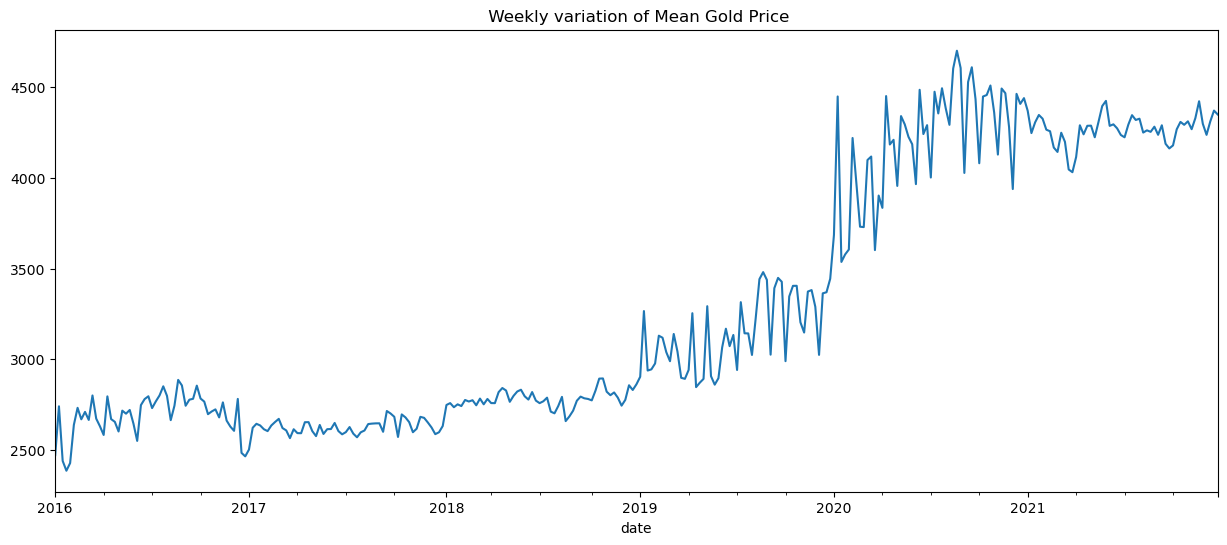

In [40]:
df3['price'].resample('W').mean().plot(figsize=(15,6))
plt.title(" Weekly variation of Mean Gold Price")
plt.show()

## Ploting The Data Series as a Heatmap per year to observe the Daily Gold Price Fluctuation

(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

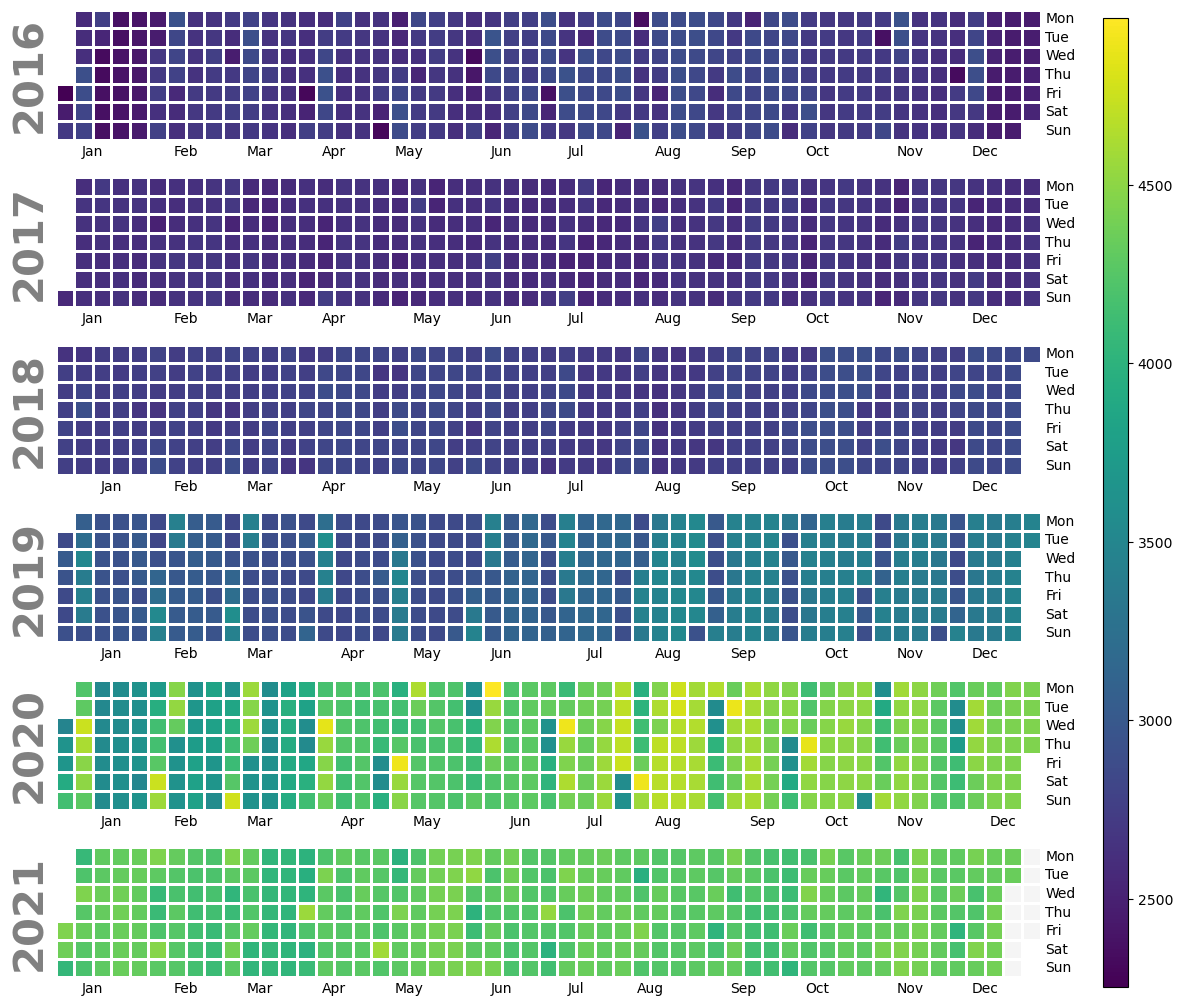

In [41]:
import calplot
calplot.calplot(df['price'],edgecolor = None, yearlabel_kws={'fontname':'sans-serif'})

## Weekly wise plots, monthly wise, exponential transformation to data and plot it for monthly check it is stationary or not.... check for autocorrelation plot, partial corelation plot , decide which model to be fitted 

## Stationary Check by Augmented dicky fuller test

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
def stationarity_check(series):
    result = adfuller(series)
    print(f"ADF statistics {result[0]}")
    print(f"       p-value  {result[1]}")
    if result[1] < 0.05:            ## p - low, null go
        print("""Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis""")
    else:
        print("Failed to reject null hypothesis data has unit root and is not Stationary ")

In [44]:
stationarity_check(df['price'])

ADF statistics -0.3099036570504764
       p-value  0.9240899189079188
Failed to reject null hypothesis data has unit root and is not Stationary 


In [45]:
df['First_difference'] = df['price']-df['price'].shift(1)
df.head()

,price,First_difference
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,201.90
2016-01-03,2708.10,253.60
2016-01-04,2577.80,-130.30
2016-01-05,2597.75,19.95


In [46]:
stationarity_check(df['First_difference'].dropna())

ADF statistics -21.664542127246406
       p-value  0.0
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


### 1 week Differencing (assuming 7 day seasonal data)

In [47]:
df['7_difference'] = df['price']-df['price'].shift(7)
df.head()

,price,First_difference,7_difference
date,,,
2016-01-01,2252.60,NaN,NaN
2016-01-02,2454.50,201.90,NaN
2016-01-03,2708.10,253.60,NaN
2016-01-04,2577.80,-130.30,NaN
2016-01-05,2597.75,19.95,NaN


In [48]:
stationarity_check(df['7_difference'].dropna())

ADF statistics -13.504453298649615
       p-value  2.933854892108645e-25
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


### 1 month differencing (Assuming 30 day seasonal data)

In [49]:
df['30_difference'] = df['price']-df['price'].shift(30)
df.head()

,price,First_difference,7_difference,30_difference
date,,,,
2016-01-01,2252.60,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN


In [50]:
df['31_difference'] = df['price']-df['price'].shift(31)
df.head()

,price,First_difference,7_difference,30_difference,31_difference
date,,,,,
2016-01-01,2252.60,NaN,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN,NaN


In [51]:
stationarity_check(df['31_difference'].dropna())

ADF statistics -10.005746322303253
       p-value  1.8335347544502225e-17
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


In [52]:
stationarity_check(df['30_difference'].dropna())

ADF statistics -10.012615740241895
       p-value  1.7623278406161932e-17
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


## dobut no. 1 - Shifting beyond 150 days data is never stationary 

In [53]:
df['150_difference'] = df['price']-df['price'].shift(150)
df.head()

,price,First_difference,7_difference,30_difference,31_difference,150_difference
date,,,,,,
2016-01-01,2252.60,NaN,NaN,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN,NaN,NaN


In [54]:
stationarity_check(df['150_difference'].dropna())

ADF statistics -2.8912724237403498
       p-value  0.04637234953708797
Strong Evidence Against null hypothesis data has no unit root and
                       is Stationary, reject null hypothesis


In [55]:
df['151_difference'] = df['price']-df['price'].shift(151)
df.head()

,price,First_difference,7_difference,30_difference,31_difference,150_difference,151_difference
date,,,,,,,
2016-01-01,2252.60,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN,NaN,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN,NaN,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN,NaN,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN,NaN,NaN,NaN


In [56]:
stationarity_check(df['151_difference'].dropna())

ADF statistics -2.659032813218453
       p-value  0.08139959101048555
Failed to reject null hypothesis data has unit root and is not Stationary 


### 1 year differencing (Assuming 365 day seasonal data)

In [57]:
df['365_difference'] = df['price']-df['price'].shift(365)
df.head()

,price,First_difference,7_difference,30_difference,31_difference,150_difference,151_difference,365_difference
date,,,,,,,,
2016-01-01,2252.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,2454.50,201.90,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,2708.10,253.60,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,2577.80,-130.30,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2597.75,19.95,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
stationarity_check(df['365_difference'].dropna())

ADF statistics -1.3023794771284165
       p-value  0.6280829980822755
Failed to reject null hypothesis data has unit root and is not Stationary 


## Absence yearly seasonality indicates that SARIMA is not suitable for the data

### ACF and PACF plot

#####  Data which is below the lower limit or above the upper limit will have a direct impact 

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

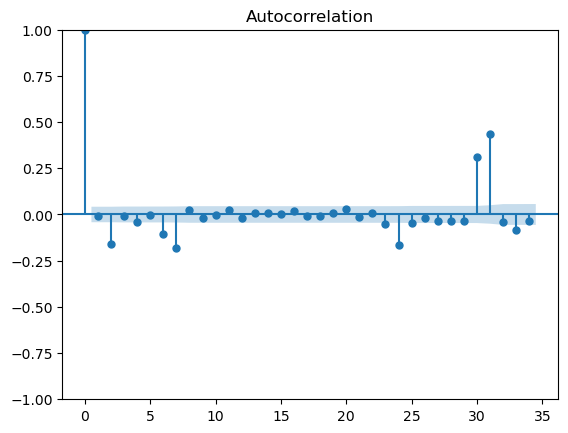

In [60]:
acf = plot_acf(df['First_difference'].dropna())

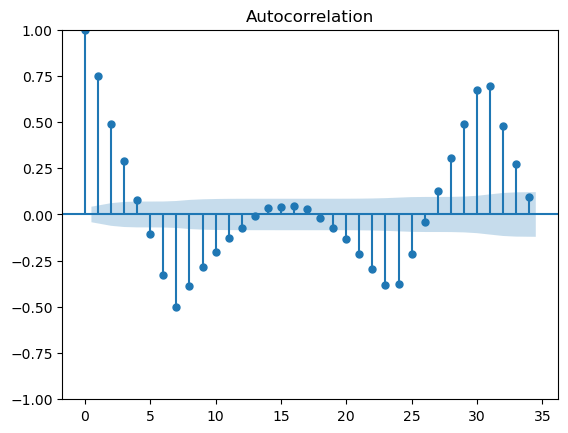

In [67]:
acf = plot_acf(df['7_difference'].dropna())

### There seems Seasonality w.r.t one month Data point  

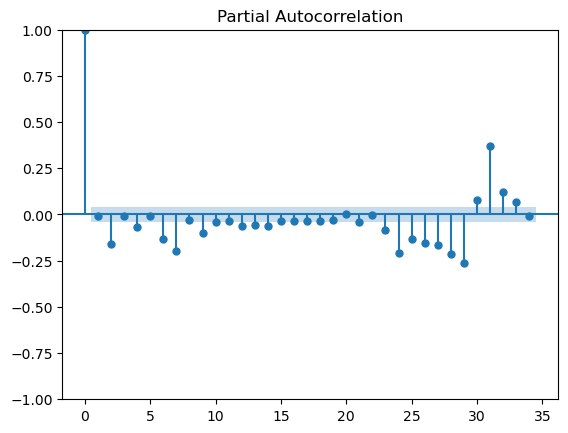

In [61]:
acf = plot_pacf(df['First_difference'].dropna())

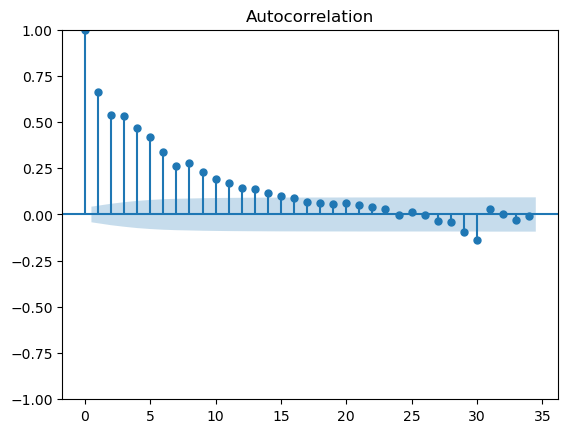

In [62]:
acf_30 = plot_acf(df['30_difference'].dropna())

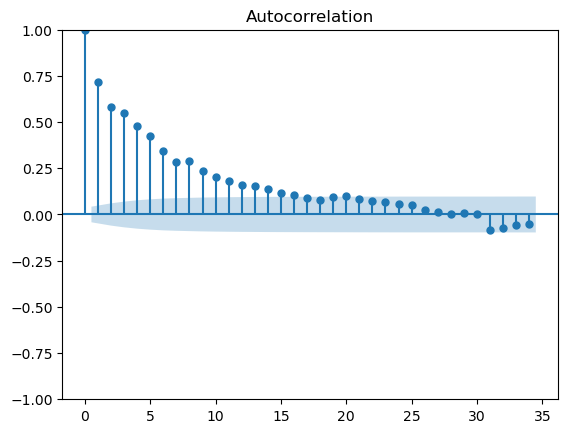

In [63]:
acf_31 = plot_acf(df['31_difference'].dropna())

### q = 16 for 31 day difference # if SARIMA model to be used 

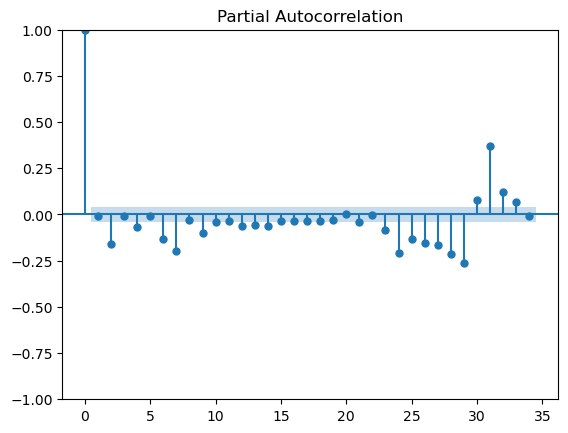

In [68]:
pacf_31 = plot_pacf(df['First_difference'].dropna())

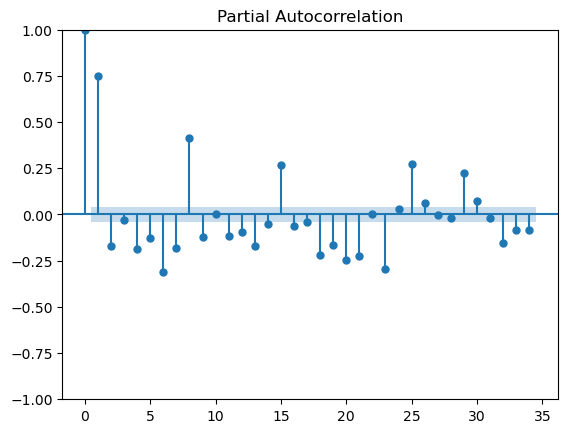

In [69]:
pacf_31 = plot_pacf(df['7_difference'].dropna())

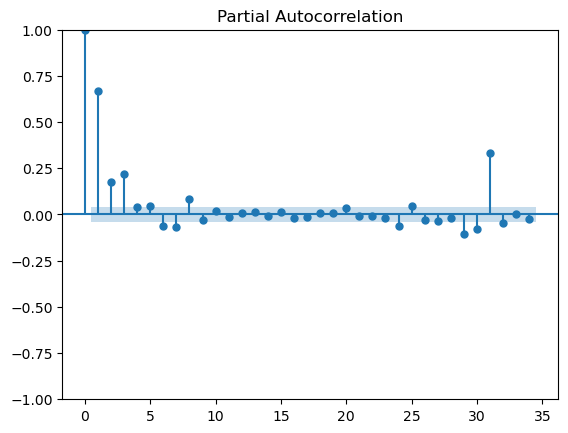

In [70]:
pacf_31 = plot_pacf(df['30_difference'].dropna())

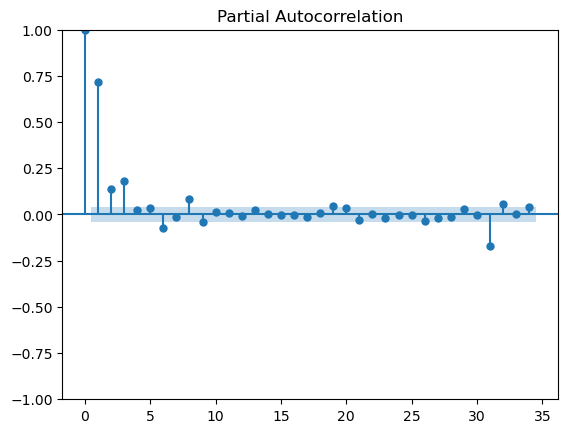

In [64]:
pacf_31 = plot_pacf(df['31_difference'].dropna())

## p values to try for ARIMA model ? data points outside upper  are [3,6,8,2,1,31]

### ETS(Error-Trend-Seasonality) decomposition of the data

In [65]:
from statsmodels.tsa.seasonal import STL

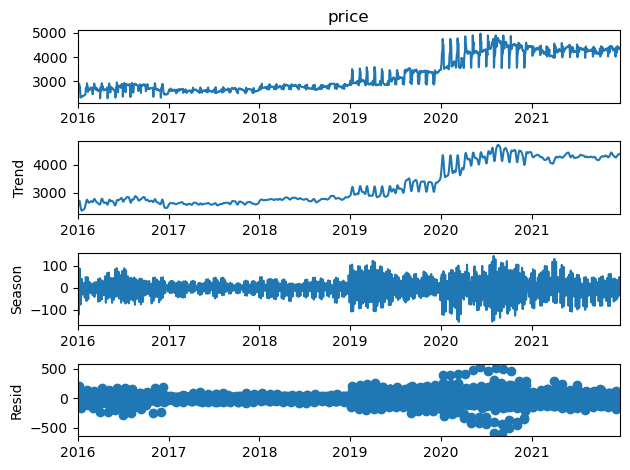

In [66]:
df5 = STL(df['price']).fit()
df5.plot()
plt.show()

## The Conclusion of EDA are following :- 
#### 1. First build AR model and check
#### 2. Build ARIMA model and with p = [3,6,8,31,2,1]
#### 3. If none of the above model works for test data build SARIMA model with q = 16 for 31 day lag.

## Verify it with ma'am